# STUDENT NUMBERS
## 1886648
## 1851234 
## 1669326

### Run and the graphs that come out will be as required along with a pandas dataframe to easily read the results.

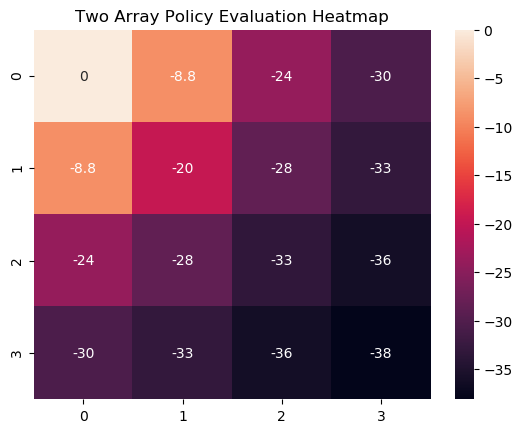

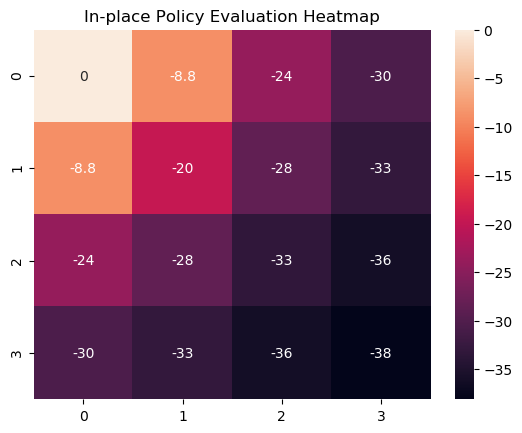

discount  iterations_2array  iterations_inplace
0   0.630957                9.0                 9.0
1   0.646437                9.0                 9.0
2   0.662297               10.0                 9.0
3   0.678545               10.0                10.0
4   0.695193               10.0                10.0
5   0.712249               11.0                11.0
6   0.729723               12.0                11.0
7   0.747626               12.0                12.0
8   0.765968               13.0                13.0
9   0.784760               14.0                14.0
10  0.804013               15.0                15.0
11  0.823739               17.0                16.0
12  0.843948               18.0                18.0
13  0.864654               20.0                20.0
14  0.885867               23.0                23.0
15  0.907601               28.0                27.0
16  0.929867               34.0                34.0
17  0.952681               45.0                45.0
18  0.976054               69.0                68.0
19  1.000000              149.0               149.0

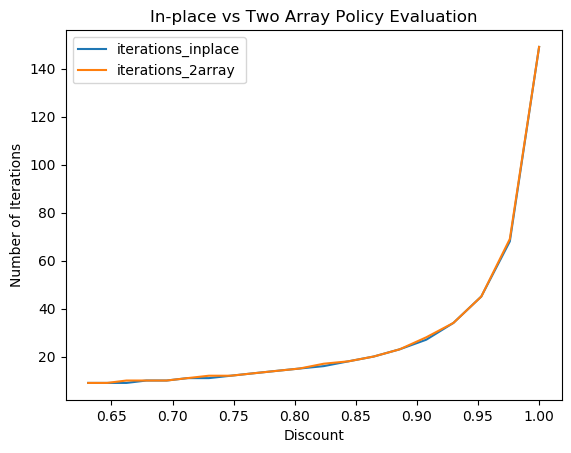

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# STUDENT NUMBERS
# 1886648
# 1851234 
# 1669326

plt.rcdefaults()

# class of grid world
class GridWorld():

    def __init__ (self, rows, cols):
        # map to denote space
        self.map = np.zeros((rows, cols))
        self.rows = rows
        self.cols = cols

    # Returns the grid and it's dimensions
    def getEnvironmentMap(self):
        return self.map, self.rows, self.cols

# Returns the next possible states based on all actions
def getNextStates(gridMap,i,j):
    
    n = gridMap.shape[0]
    next = []
    
    acts = ((i-1,j),(i+1,j),(i,j+1),(i,j-1))
    
    for k in range(0,4):
        a = acts[k]
        if a[0] >= n or a[0] < 0 or a[1] >= n or a[1] < 0:
            next.append((i,j))
        else:
            next.append(a)
    
    return next

# Returns the rewards for moving on the given states
def getRewards(rewards,states):
    re = []
    
    for i in range(0,len(states)):
        s = states[i]
        re.append(rewards[s[0],s[1]])
        
    return re

# Returns the values of states given
def getValue(V,states):
    val = []

    for i in range(0,len(states)):
        s = states[i]
        val.append(V[s[0],s[1]])
        
    
    return val

# Using the two array version of policy evaluation, the value function is calculated
def policyEvaluation_2Array(gridWorld,rewards,theta,discount):
    gridMap , row , col = gridWorld.getEnvironmentMap()
    V = np.zeros((row,col))
    V_prev = np.zeros((row,col))
    t = 0
    
    while True:
        delta = 0
        t += 1
        for i in range(0,row):
            for j in range(0,col):
                val =  V[i,j]
            
                pi = 0.25
                next_s = getNextStates(gridMap,i,j)
                rew_s = getRewards(rewards,next_s)
                
                if (i,j) == (0,0):
                    V[i,j] = 0
                else:
                    V[i,j] = np.sum(pi*(rew_s + np.multiply(discount,getValue(V_prev,next_s))))
                
                vDiff = abs(val-V[i,j])
                delta = max(delta,vDiff)
      
        V_prev = V
        if delta < theta:
            break;
    
    return V,t
    
# Using the in place version of policy evaluation, the value function is calculated
def policyEvaluation(gridWorld,rewards,theta,discount):
    gridMap , row , col = gridWorld.getEnvironmentMap()
    V = np.zeros((row,col))
    t = 0
    
    while True:
        delta = 0
        t += 1
        
        for i in range(0,row):
            for j in range(0,col):
                val =  V[i,j]
            
                pi = 0.25
                next_s = getNextStates(gridMap,i,j)
                rew_s = getRewards(rewards,next_s)
                
                if (i,j) == (0,0):
                    V[i,j] = 0
                else:
                    V[i,j] = np.sum(pi*(rew_s + np.multiply(discount,getValue(V,next_s))))
                
                
                vDiff = abs(val-V[i,j])
                delta = max(delta,vDiff)
      
        if delta < theta:
            break;
    
    return V,t

# The creation of the grid world
gridWorld = GridWorld(4,4)
goal = np.array([0,0])

# Creating the rewards function
rewards = np.ones((4,4))*-1
rewards[0,0] = 20
# print(rewards)

theta = 0.01
discount = 1

# Policy Evaluation using 2 array + heatmap
matrix,t = policyEvaluation_2Array(gridWorld,rewards,theta,discount)
# print("mat ",matrix)
sns.heatmap(matrix, annot = True)
plt.title('Two Array Policy Evaluation Heatmap')
plt.savefig("2Arr_heatmap.png")
plt.show()

# Policy Evaluation using in place + heatmap
matrix,t = policyEvaluation(gridWorld,rewards,theta,discount)
# print("mat ",matrix)
sns.heatmap(matrix, annot = True)
plt.title('In-place Policy Evaluation Heatmap')
plt.savefig("inplace_heatmap.png")
plt.show()

iterDF = pd.DataFrame()

discounts = np.logspace(- 0.2, 0, num=20)
for d in discounts:
    matrix,t = policyEvaluation(gridWorld,rewards,theta,d)
    matrix,t2 = policyEvaluation_2Array(gridWorld,rewards,theta,d)
    iterDF = iterDF.append({"discount" : d, "iterations_inplace" : t, "iterations_2array" : t2}, ignore_index = True)
 
display(iterDF)
plt.plot('discount', 'iterations_inplace', data=iterDF)
plt.plot('discount', 'iterations_2array', data=iterDF)
plt.title('In-place vs Two Array Policy Evaluation')
plt.xlabel('Discount')
plt.ylabel('Number of Iterations')
plt.legend()
plt.savefig("2Arr_inplace_comparisons.png")
plt.show()